In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Leemos los datos
walventas = pd.read_csv('walventas.csv')
walventas

,Año,Ventas,Retail,AP_AnC,CAPEX,PIB,Inflación
0,2008,244917,2243854,73701,11316,1109.99,5.13
1,2009,270451,2263837,79265,9735,900.05,5.30
2,2010,335857,2366038,125695,13130,1057.80,4.16
3,2011,380907,2516975,135820,18352,1180.49,3.40
4,2012,412060,2827168,135991,14660,1201.09,4.11
5,2013,423823,2946624,139270,13987,1274.44,3.80
6,2014,440988,3036967,147892,12691,1315.36,4.02
7,2015,475911,3234206,157385,12526,1171.87,2.72
8,2016,532384,3498472,171238,14335,1078.49,2.82
9,2017,573371,3787143,175088,17426,1158.91,6.04


In [ ]:
X = walventas.iloc[:,2:].values
y = walventas.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

#Normalizamos los datos
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

#Estandarización
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

#PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
#Creación de los modelos
lasso = Lasso(alpha=0.6)
ridge = Ridge(alpha=0.5)
lineal = LinearRegression()

lasso_norm = Lasso(alpha=0.8)
ridge_norm = Ridge(alpha=0.01)
lineal_norm = LinearRegression()

lasso_std = Lasso(alpha=0.1)
ridge_std = Ridge(alpha=0.015)
lineal_std = LinearRegression()

lasso_pca = Lasso(alpha=0.01)
ridge_pca = Ridge(alpha=1.0)
lineal_pca = LinearRegression()

In [ ]:
#Entrenamiento de los modelos
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lineal.fit(X_train,y_train)

lasso_norm.fit(X_train_norm,y_train)
ridge_norm.fit(X_train_norm,y_train)
lineal_norm.fit(X_train_norm,y_train)

lasso_std.fit(X_train_std,y_train)
ridge_std.fit(X_train_std,y_train)
lineal_std.fit(X_train_std,y_train)

lasso_pca.fit(X_train_pca,y_train)
ridge_pca.fit(X_train_pca,y_train)
lineal_pca.fit(X_train_pca,y_train)

LinearRegression()

In [ ]:
#Predicciones de los modelos
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lineal = lineal.predict(X_test)

y_pred_lasso_norm = lasso_norm.predict(X_test_norm)
y_pred_ridge_norm = ridge_norm.predict(X_test_norm)
y_pred_lineal_norm = lineal_norm.predict(X_test_norm)

y_pred_lasso_std = lasso_std.predict(X_test_std)
y_pred_ridge_std = ridge_std.predict(X_test_std)
y_pred_lineal_std = lineal_std.predict(X_test_std)

y_pred_lasso_pca = lasso_pca.predict(X_test_pca)
y_pred_ridge_pca = ridge_pca.predict(X_test_pca)
y_pred_lineal_pca = lineal_pca.predict(X_test_pca)

In [ ]:
#Evaluación de los modelos
linear_loss = mean_squared_error(y_test,y_pred_lineal)
lasso_loss = mean_squared_error(y_test,y_pred_lasso)
ridge_loss = mean_squared_error(y_test,y_pred_ridge)

linear_loss_norm = mean_squared_error(y_test,y_pred_lineal_norm)
lasso_loss_norm = mean_squared_error(y_test,y_pred_lasso_norm)
ridge_loss_norm = mean_squared_error(y_test,y_pred_ridge_norm)

linear_loss_std = mean_squared_error(y_test,y_pred_lineal_std)
lasso_loss_std = mean_squared_error(y_test,y_pred_lasso_std)
ridge_loss_std = mean_squared_error(y_test,y_pred_ridge_std)

linear_loss_pca = mean_squared_error(y_test,y_pred_lineal_pca)
lasso_loss_pca = mean_squared_error(y_test,y_pred_lasso_pca)
ridge_loss_pca = mean_squared_error(y_test,y_pred_ridge_pca)

print('Linear Loss:' ,linear_loss)
print('Lasso Loss:' ,lasso_loss)
print('Ridge Loss:' ,ridge_loss)
print('_'*64)
print('Linear Loss Norm:' ,linear_loss_norm)
print('Lasso Loss Norm:' ,lasso_loss_norm)
print('Ridge Loss Norm:' ,ridge_loss_norm)
print('_'*64)
print('Linear Loss Std:' ,linear_loss_std)
print('Lasso Loss Std:' ,lasso_loss_std)
print('Ridge Loss Std:' ,ridge_loss_std)
print('_'*64)
print('Linear Loss PCA:' ,linear_loss_pca)
print('Lasso Loss PCA:' ,lasso_loss_pca)
print('Ridge Loss PCA:' ,ridge_loss_pca)

Linear Loss: 707198830.9140444
Lasso Loss: 707188349.3688234
Ridge Loss: 705878939.849499
________________________________________________________________
Linear Loss Norm: 707198830.9138914
Lasso Loss Norm: 705958380.1589681
Ridge Loss Norm: 955621998.0364466
________________________________________________________________
Linear Loss Std: 707198830.9138949
Lasso Loss Std: 707146504.8641546
Ridge Loss Std: 669421312.039182
________________________________________________________________
Linear Loss PCA: 4291759092.441352
Lasso Loss PCA: 4291762753.5797853
Ridge Loss PCA: 5612525286.629544


In [ ]:
x1 = walventas.iloc[:,0].values
y1 = walventas.iloc[:,1].values

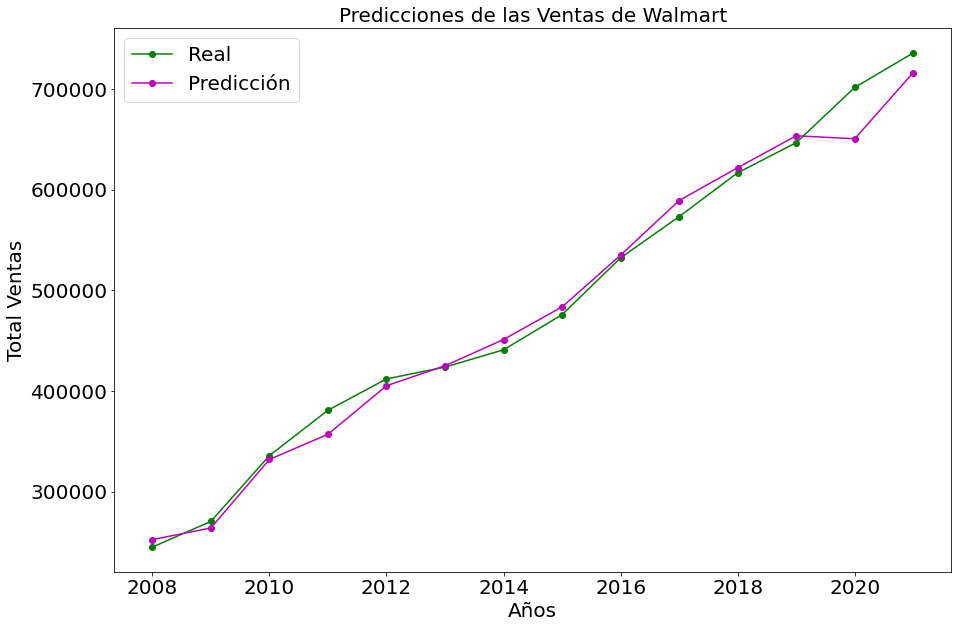

In [ ]:
#Graficas
import matplotlib.pyplot as plt
#y2_ = std.transform(X)
y2 = ridge.predict(X)

y3_ = norm.transform(X)
y3 = lasso_norm.predict(y3_)

y4_ = std.transform(X)
y4 = ridge_std.predict(y4_)

plt.figure(figsize=(15,10))
plt.plot(x1,y1,'go-',label='Real')
plt.plot(x1,y4,'mo-',label='Predicción')

plt.title('Predicciones de las Ventas de Walmart',fontsize=20)
plt.xlabel('Años',fontsize=20)
plt.ylabel('Total Ventas',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='upper left',fontsize=20)
plt.show()

In [ ]:
#Coeficientes de los modelos
ridge_std.coef_

array([114225.12795611,  56710.7375594 ,  -4015.25638958,    587.60732127,
         3581.21672337])